===
Week4_class.Rmd
Requires: fpp, forecast packages
===

Most of this code is adapted from the code available with the FPP book
First let's look at how to implement simple exponential smoothing (SES)




In [3]:
require(fpp)

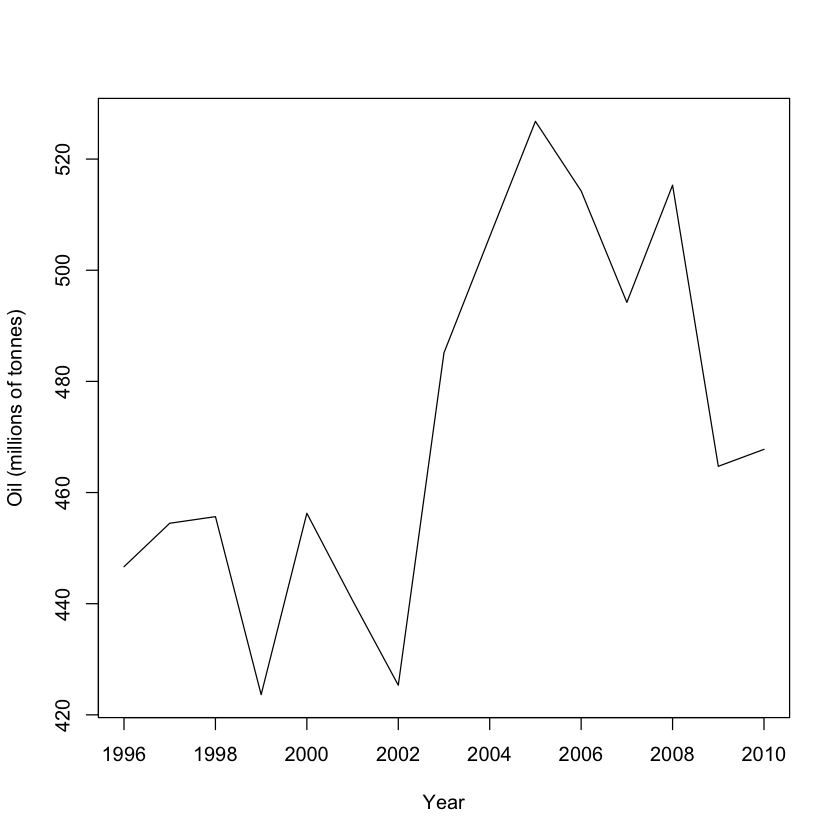

In [4]:
# Simple exponential smoothing - code from the FPP book
oildata_full = window(oil, start=1996, end=2010)
oildata_train <- window(oil, start = 1996, end = 2007)
plot(oildata_full, ylab = "Oil (millions of tonnes)", xlab = "Year", xlim=c(1996, 2010))

In [5]:
ses2 <- ses(oildata_train, alpha = 0.2, initial = "simple", h = 3)

ses6 <- ses(oildata_train, alpha = 0.6, initial = "simple", h = 3)

#note no value for alpha and no initial value.  The algorithm will calculate alpha as part of the optimization.
ses <- ses(oildata_train, h = 3)

In [12]:
summary(ses2)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(x = oildata_train, h = 3, initial = "simple", alpha = 0.2) 

  Smoothing parameters:
    alpha = 0.2 

  Initial states:
    l = 446.6565 

  sigma:  32.1348
Error measures:
                   ME    RMSE      MAE      MPE     MAPE     MASE      ACF1
Training set 15.89414 32.1348 24.66102 3.010684 5.067472 1.136664 0.5102479

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       484.8025 443.6201 525.9849 421.8194 547.7855
2009       484.8025 442.8045 526.8004 420.5721 549.0328
2010       484.8025 442.0045 527.6005 419.3486 550.2564


In [6]:
summary(ses)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(x = oildata_train, h = 3) 

  Smoothing parameters:
    alpha = 0.8921 

  Initial states:
    l = 447.4808 

  sigma:  25.1221

     AIC     AICc      BIC 
111.1888 112.5221 112.1586 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 4.578526 25.12207 20.05797 0.8091703 4.252042 0.9245025
                    ACF1
Training set -0.03891839

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       496.4923 464.2971 528.6876 447.2540 545.7307
2009       496.4923 453.3488 539.6359 430.5100 562.4747
2010       496.4923 444.6638 548.3208 417.2275 575.7572


Notice:  we used the SES command and it executed the ETS(A,N,N) command.  ses is just a wrapper for ETS.

Also notice the estimate for alpha.  That came from the optimization. So did the initial state number (447.48)

Let's look at some pictures.




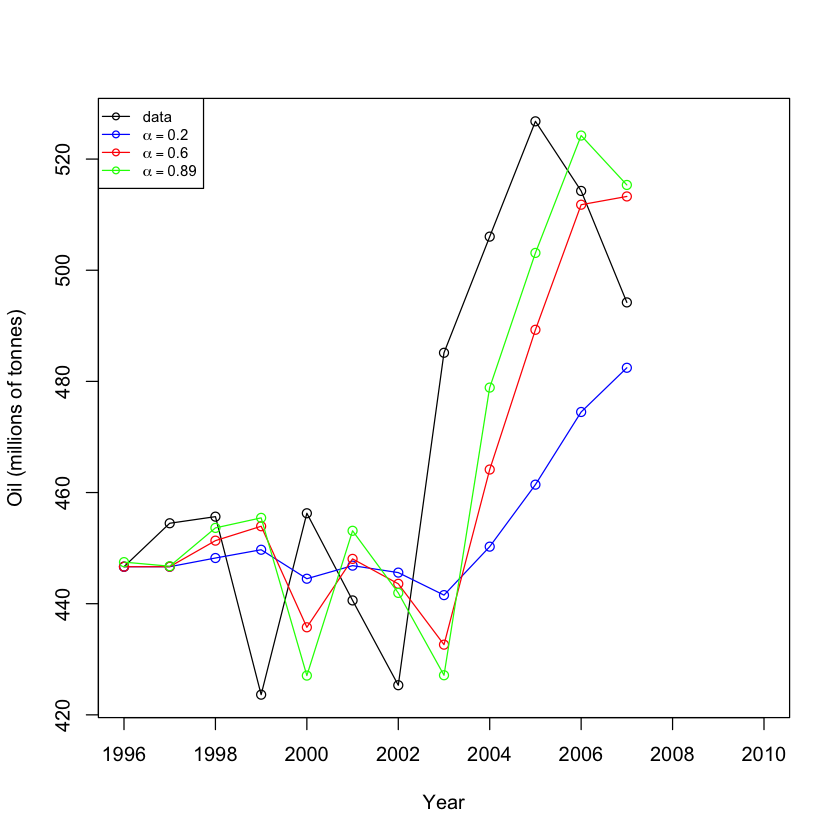

In [8]:
plot(ses2
     , plot.conf=FALSE
     , ylab="Oil (millions of tonnes)"
     , xlab="Year"
     , main=""
     , fcol="white"
     , type="o")
lines(fitted(ses2), col="blue", type="o")
lines(fitted(ses6), col="red", type="o")
lines(fitted(ses), col="green", type="o")

legend("topleft"
       , lty=1
       , col=c(1,"blue","red","green")
       , cex = 0.75
       , c("data", expression(alpha == 0.2), expression(alpha == 0.6), expression(alpha == 0.89))
       , pch=1)



This just covers our existing data - we've fitted the data with several options for the smoothing parameter.  Notice how flat things get when alpha is really small.

Now let's try forecasting - we're fitting these smoothing methods to data through 2007 but our data really goes through 2010


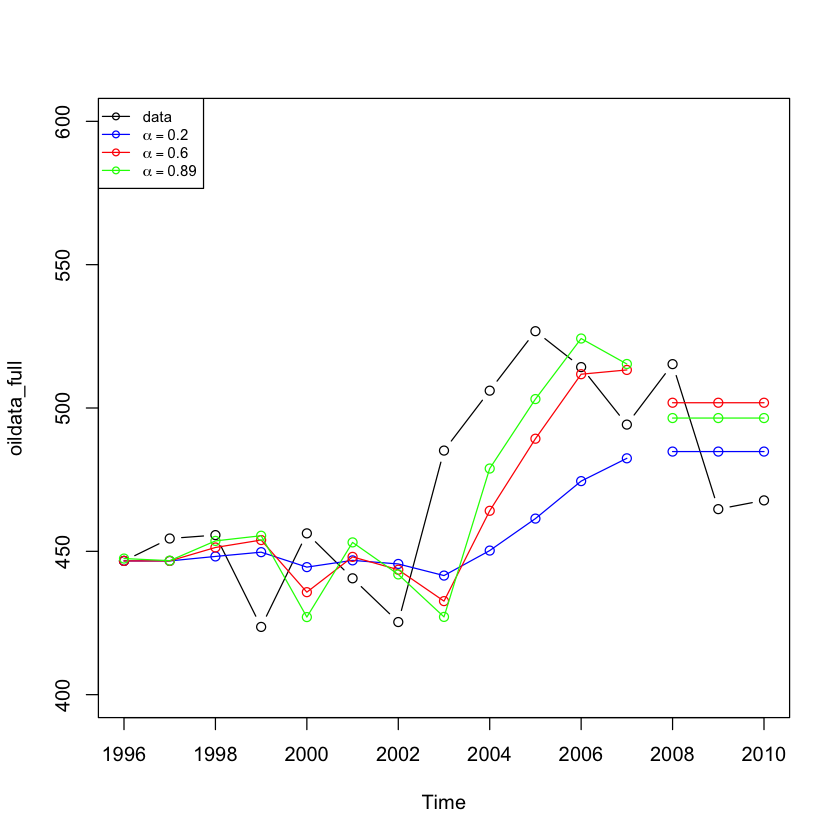

In [11]:
plot(oildata_full, ylim=c(400, 600), type="b")

lines(fitted(ses2), col="blue", type="o")
lines(ses2$mean, col="blue", type="o")

lines(fitted(ses6), col="red", type="o")
lines(ses6$mean, col="red", type="o")

lines(fitted(ses), col="green", type="o")
lines(ses$mean, col="green", type="o")

legend("topleft"
       , lty=1
       , cex=0.75
       , col=c(1, "blue", "red", "green")
       , c("data", expression(alpha == 0.2), expression(alpha == 0.6), expression(alpha == 0.89))
       , pch=1)

Next set of methods: Holt exponential smoothing.



In [18]:
holtBasic <- holt(oildata_train, alpha=0.8, beta=0.2, initial="simple", h=3)

In [19]:
class(holtBasic)

[1] "forecast"

In [20]:
summary(holtBasic)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = oildata_train, h = 3, initial = "simple", alpha = 0.8,  

 Call:
     beta = 0.2) 

  Smoothing parameters:
    alpha = 0.8 
    beta  = 0.2 

  Initial states:
    l = 446.6565 
    b = 7.8168 

  sigma:  26.9797
Error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set -1.768733 26.97966 22.20042 -0.526348 4.718622 1.023252 0.03909422

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       505.5729 470.9971 540.1487 452.6938 558.4521
2009       509.9937 455.9846 564.0029 427.3938 592.5936
2010       514.4146 441.8877 586.9414 403.4943 625.3348


Notice that it shows the parameter settings we gave it. We now have a setting for the effect of the trend.  What's the initial value?  It's the first value of the oildata series - because we set the initialization routine = "simple"

Adding these lines to our chart.  What is the effect of adding trend?


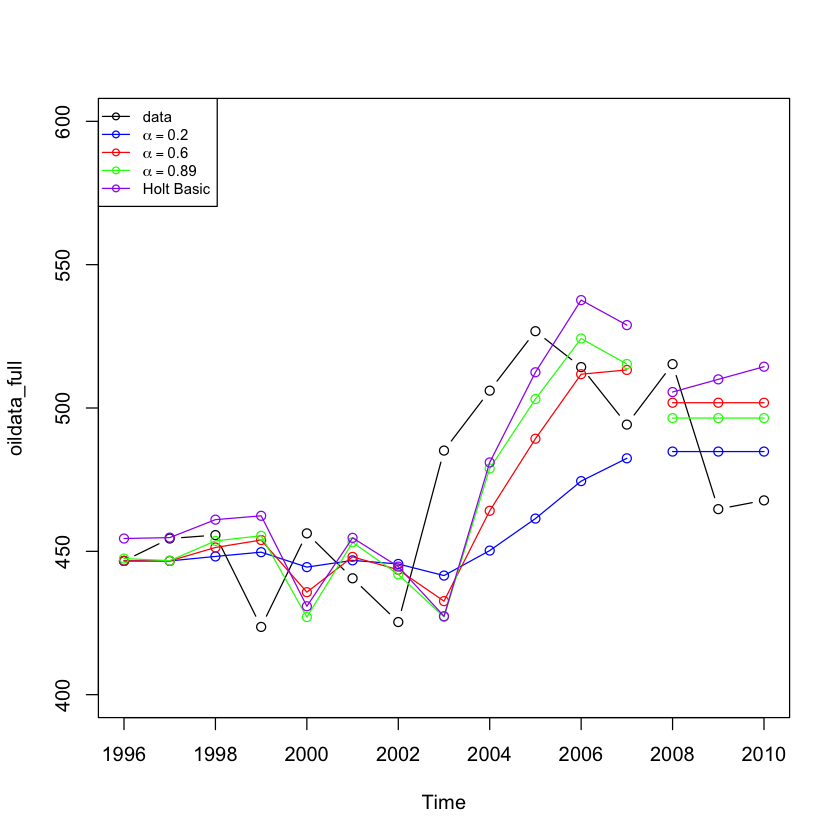

In [23]:
plot(oildata_full, ylim=c(400, 600), type="b")

lines(fitted(ses2), col="blue", type="o")
lines(ses2$mean, col="blue", type="o")

lines(fitted(ses6), col="red", type="o")
lines(ses6$mean, col="red", type="o")

lines(fitted(ses), col="green", type="o")
lines(ses$mean, col="green", type="o")

lines(fitted(holtBasic), type = "o", col="purple")
lines(holtBasic$mean, col="purple", type="o")

legend("topleft"
       , lty=1
       , cex =0.75
       , col=c(1, "blue", "red", "green", "purple")
       , c("data", expression(alpha == 0.2), expression(alpha == 0.6), expression(alpha == 0.89), "Holt Basic")
       , pch=1)


That was the additive trend model - let's make it muliplicative.


In [39]:
fith1 <- holt(oildata_train, alpha=1, beta=0.6, initial="simple", exponential=TRUE, h=3)
summary(fith1)


Forecast method: Holt's method with exponential trend

Model Information:
Holt's method with exponential trend 

Call:
 holt(x = oildata_train, h = 3, initial = "simple", exponential = TRUE,  

 Call:
     alpha = 1, beta = 0.6) 

  Smoothing parameters:
    alpha = 1 
    beta  = 0.6 

  Initial states:
    l = 446.6565 
    b = 1.0175 

  sigma:  0.0717
Error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set -3.937222 31.45882 24.62359 -0.8721572 5.254226 1.134939
                   ACF1
Training set -0.2980891

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       483.5337 438.8038 527.5940 415.0060 549.8297
2009       473.0871 392.5578 556.3238 355.1507 608.8141
2010       462.8661 345.6780 601.0352 298.0567 684.5842


In [40]:
fith2 <- holt(oildata_train, alpha=0.8, beta=0.6, initial="simple", exponential=TRUE, h=3)
summary(fith2)


Forecast method: Holt's method with exponential trend

Model Information:
Holt's method with exponential trend 

Call:
 holt(x = oildata_train, h = 3, initial = "simple", exponential = TRUE,  

 Call:
     alpha = 0.8, beta = 0.6) 

  Smoothing parameters:
    alpha = 0.8 
    beta  = 0.6 

  Initial states:
    l = 446.6565 
    b = 1.0175 

  sigma:  0.0663
Error measures:
                    ME     RMSE     MAE        MPE     MAPE     MASE
Training set -4.227278 30.13478 23.4046 -0.9396064 4.968251 1.078754
                    ACF1
Training set -0.02862082

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       492.2319 451.8763 534.5211 429.2743 555.9221
2009       483.1454 416.0489 555.7386 381.2570 597.5703
2010       474.2266 376.2683 588.8825 330.5409 657.4668


We specified alpha and beta and told it to start with the initial value and the initial trend.

Now add that line to the chart:


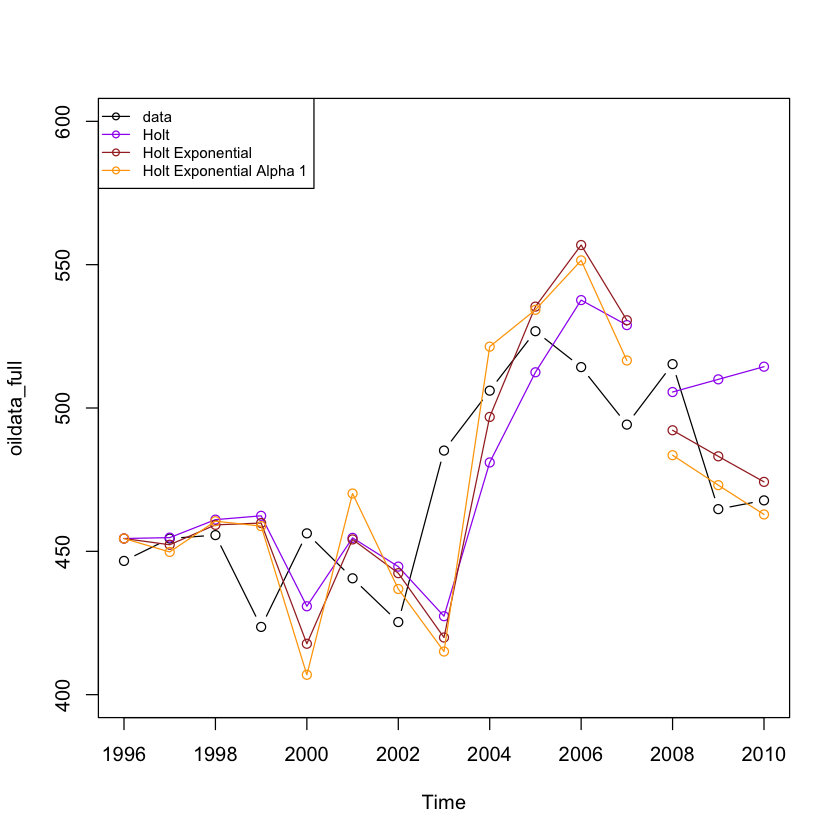

In [41]:
plot(oildata_full, ylim=c(400, 600), type="b")
#this just plots the data through 2007 because that's what we ran the model over
#we have more data but have to plot it seperately if we want to compare the forecast with the actual
# add these lines for putting the actual data past 2007


#lines(fitted(ses2), col="blue", type="o")
#lines(ses2$mean, col="blue", type="o")

#lines(fitted(ses6), col="red", type="o")
#lines(ses6$mean, col="red", type="o")

#lines(fitted(ses), col="green", type="o")
#lines(ses$mean, col="green", type="o")

lines(fitted(holtBasic), type = "o", col="purple")
lines(holtBasic$mean, col="purple", type="o")

lines(fitted(fith2), col="brown", type = "o")
lines(fith2$mean, col="brown", type="o")

lines(fitted(fith1), col="orange", type = "o")
lines(fith1$mean, col="orange", type="o")

legend("topleft", cex =0.75, lty=1
       , col=c(1
               #, "blue"
               #, "red"
               #, "green"
               , "purple"
               , "brown"
               , "orange"),
       , c("data"
         #, expression(alpha == 0.2)
         #, expression(alpha == 0.6)
         #, expression(alpha == 0.89)
         , "Holt"
         , "Holt Exponential"
         , "Holt Exponential Alpha 1")
       , pch=1)




Let's compare the simple exponential smoothing with the Holt model



In [46]:
air <- window(ausair,start=1990,end=2004)
fit0 <- ses(air, alpha = 0.8, beta = 0.2,initial = "simple", h=5)
fit1 <- holt(air, alpha=0.8, beta=0.2, initial="simple", h=5)
fit2 <- holt(air,alpha=0.8,beta=0.2,initial="simple",exponential=TRUE,h=5)

fit3 <- holt(air, alpha=0.8, beta=0.2, damped=TRUE, h=5)
fit4 <- holt(air, alpha=0.8, beta=0.2, damped=TRUE, exponential = TRUE, h=5)

In [47]:
summary(fit1)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = air, h = 5, initial = "simple", alpha = 0.8, beta = 0.2) 

  Smoothing parameters:
    alpha = 0.8 
    beta  = 0.2 

  Initial states:
    l = 17.5534 
    b = 4.3067 

  sigma:  2.2029
Error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE     ACF1
Training set -1.029227 2.202869 1.772637 -4.485612 6.364749 0.967131 0.208894

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005       43.75697 40.93388 46.58006 39.43943 48.07451
2006       45.59352 41.18372 50.00333 38.84931 52.33774
2007       47.43008 41.50832 53.35184 38.37352 56.48663
2008       49.26663 41.81881 56.71446 37.87617 60.65709
2009       51.10319 42.08696 60.11941 37.31406 64.89232


In [48]:
fit1$model$state

l,b
17.55340,4.306700
18.41474,3.617628
21.89455,3.590065
24.20620,3.334382
27.05156,3.236576
27.56843,2.692635
29.11733,2.463889
30.37632,2.222910
31.28265,1.959592
30.79701,1.470546


In [44]:
fitted(fit1)

Time Series:
Start = 1990 
End = 2004 
Frequency = 1 
 [1] 21.86010 22.03237 25.48462 27.54059 30.28813 30.26106 31.58122 32.59923
 [9] 33.24224 32.26755 33.07776 33.95807 34.77708 40.05535 43.21586

In [45]:
fit1$mean

Time Series:
Start = 2005 
End = 2009 
Frequency = 1 
[1] 43.75697 45.59352 47.43008 49.26663 51.10319

The forecast object has the fitted and the forecast values as well as the values for the trend and the level.

You can plot those pieces:


In [ ]:
plot(fit2$model$state)

In [ ]:
plot(fit2, type="o", ylab="Air passengers in Australia (millions)",
     xlab="Year", fcol="white", plot.conf=FALSE)
lines(fitted(fit0), col="brown")
lines(fitted(fit1), col="blue")
lines(fitted(fit2), col="red")
lines(fitted(fit3), col="green")
lines(fitted(fit4), col="purple")
lines(fit0$mean, col="brown", type="o")
lines(fit1$mean, col="blue", type="o")
lines(fit2$mean, col="red", type="o")
lines(fit3$mean, col="green", type="o")
lines(fit4$mean, col="purple", type="o")

legend("topleft", lty=1, cex=0.6, col=c("black", "brown", "blue", "red", "green", "purple"),
       c("Data","SES", "Holt", "Exponent", "Additive damped trend", "Mult damped trend"))


So we can see how the forecast differs across various methods.  What is the effect of changing the parameters for any single method?


In [ ]:
livestock2 <- window(livestock,start=1970,end=2000)

fit1 <- holt(livestock2,alpha = 0.8, beta = .1)
fit2 <- holt(livestock2, alpha = .6, beta = .1)
fit3 <- holt(livestock2,alpha = .4, beta = .1)



plot(fit3, type="o", ylab="Livestock, sheep in Asia (millions)", ylim = c(250, 475),
     flwd=1, plot.conf=FALSE, xlab = "beta = 0.1")
lines(window(livestock,start=2001),type="o")
lines(fit1$mean,col=2)
lines(fit2$mean,col=3)

legend("topleft", cex = 0.75, lty=1, pch=1, col=1:4,
       c("Data","Alpha = 0.8","Alpha = 0.4","Alpha = 0.2"))


Trend parameter:


In [ ]:
livestock2 <- window(livestock,start=1970,end=2000)
fit1 <- holt(livestock2,alpha = 0.8, beta = .1)
fit2 <- holt(livestock2, alpha = .8, beta = .5)
fit3 <- holt(livestock2,alpha = .8, beta = .7)



plot(fit3, type="o", ylab="Livestock, sheep in Asia (millions)", ylim = c(250, 475),
     flwd=1, plot.conf=FALSE, xlab = "alpha = .8")
lines(window(livestock,start=2001),type="o")
lines(fit1$mean,col=2)
lines(fit2$mean,col=3)

legend("topleft", cex = 0.75, lty=1, pch=1, col=1:4,
       c("Data","Beta = 0.1","Beta = 0.5","Beta = 0.7"))





HW Seasonal models
Let's look at Tourists to Australia


In [ ]:
aust <- window(austourists,start=2005)
fit1hw <- hw(aust,seasonal="additive")
fit2hw <- hw(aust,seasonal="multiplicative")
fit3hw <- hw(aust,seasonal="additive", damped = TRUE)

plot(fit2hw,ylab="International visitor night in Australia (millions)",
     plot.conf=FALSE, type="o", fcol="white", xlab="Year")
lines(fitted(fit1hw), col="red", lty=2)
lines(fitted(fit2hw), col="green", lty=2)
lines(fit1hw$mean, type="o", col="red")
lines(fit2hw$mean, type="o", col="green")
legend("topleft",lty=1, cex = 0.75, pch=1, col=1:3,
  c("data","Holt Winters' Additive","Holt Winters' Multiplicative"))

We can pull the different pieces out of the forecast object and compare them across specifications.  What's the difference between additive seasonal and multiplicative seasonal?



In [ ]:
states <- cbind(fit1hw$model$states[,1:3],fit2hw$model$states[,1:3])
colnames(states) <- c("level","slope","seasonal","level","slope","seasonal")
plot(states, xlab="Year", main = "Comparing Additive and Multiplicative Seasonals")


Let's revisit the oil data - we originally used the SES model on it which is equivalent to ETS(A,N,N)



In [ ]:
oildata <- window(oil, start = 1996, end = 2007)
fita <- ets(oildata, model = "ANN")
plot(forecast(fita, h=3), ylab="Oil (millions of tonnes)")
summary(fita)
ls(fita)  #list names of the objects in the specified environment
fita$par



What if we used the ETS(M,N,N) model?



In [ ]:
oildata <- window(oil, start = 1996, end = 2007)
fitm <- ets(oildata, model = "MNN")
plot(forecast(fitm, h=3), ylab="Oil (millions of tonnes)")
summary(fitm)
ls(fitm)  #list names of the objects in the specified environment
fitm$par


But are either of these the right model for these data?  What if we let the ETS code decide?



In [ ]:
oildata <- window(oil, start = 1996, end = 2007)
fit <- ets(oildata)
summary(fit)
plot(fit)
plot(forecast(fit, h = 8), ylab = "Oil (millions of tonnes)")




The model chose additive.  Compare the AIC for the two we examined.



In [ ]:
fita$aic
fitm$aic

Yup - the AIC for the additive model is lower so it is the "better" model

How about a more interesting example?
Remember the Australian visitors data?


In [ ]:
aust <- window(austourists,start=2005)
plot(aust, main = "International visitor night in Australia", ylab = "Millions")

Very strongly seasonal.  Probably not a good candidate for the ETS(A,N,N) model.  Let's see:



In [ ]:
fit <- ets(aust)
summary(fit)

plot(fit)

plot(forecast(fit, h = 8), ylab = "Millions")

The winner is multiplicative errors, no trend, no seasonality.


What about our ubiquitous air passengers data?


In [ ]:
ap <- window(AirPassengers, start = 1949, end = 1958)
fit <- ets(ap)
summary(fit)

plot(fit)

plot(forecast(fit, h = 8), ylab = "Millions")


Same thing.
